<a href="https://colab.research.google.com/github/krishnakumar51/HugginFace-mongoDB/blob/main/HugginFace%2BMongoDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HuggingFace Model + MongoDB

In [ ]:
!pip install -U transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 16.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
!pip install datasets pandas pymongo sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 13.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
import pandas as pd

In [ ]:
# dataset=load_dataset("AIatMongoDB/embedded_movies")
dataset=load_dataset("MongoDB/embedded_movies")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated', 'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot', 'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
        num_rows: 1500
    })
})

In [ ]:
dataset_df=pd.DataFrame(dataset["train"])

In [ ]:
dataset_df.head()

,directors,title,imdb,plot_embedding,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","[0.00072939653, -0.026834568, 0.013515796, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","[-0.022837115, -0.022941574, 0.014937485, -0.0...","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0
2,[Herbert Brenon],Beau Geste,"{'id': 16634, 'rating': 6.9, 'votes': 222}","[0.00023330493, -0.028511643, 0.014653289, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Herbert Brenon (adaptation), John Russell (ad...",NaN,[English],"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",None,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",101.0,"Michael ""Beau"" Geste leaves England in disgrac...",0
3,[Albert Parker],The Black Pirate,"{'id': 16654, 'rating': 7.2, 'votes': 1146}","[-0.005927917, -0.033394486, 0.0015323418, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Douglas Fairbanks (story), Jack Cunningham (a...",NaN,None,A nobleman vows to avenge the death of his fat...,"[Adventure, Action]",https://m.media-amazon.com/images/M/MV5BMzU0ND...,"[Billie Dove, Tempe Pigott, Donald Crisp, Sam ...",88.0,"Seeking revenge, an athletic young man joins t...",1
4,[Sam Taylor],For Heaven's Sake,"{'id': 16895, 'rating': 7.6, 'votes': 918}","[-0.0059373598, -0.026604708, -0.0070914757, -...","{'nominations': 1, 'text': '1 nomination.', 'w...",PASSED,[USA],movie,"[Ted Wilde (story), John Grey (story), Clyde B...",NaN,[English],"The Uptown Boy, J. Harold Manners (Lloyd) is a...","[Action, Comedy, Romance]",https://m.media-amazon.com/images/M/MV5BMTcxMT...,"[Harold Lloyd, Jobyna Ralston, Noah Young, Jim...",58.0,An irresponsible young millionaire changes his...,0


In [ ]:
dataset_df.columns

Index(['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated',
       'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot',
       'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
      dtype='object')

In [ ]:
dataset_df["plot"][0]

"Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle's secretary has been named as her guardian until she marries, at which time she will officially take ..."

In [ ]:
dataset_df["fullplot"][0]

'Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle\'s secretary has been named as her guardian until she marries, at which time she will officially take possession of her inheritance. Meanwhile, her "guardian" and his confederates constantly come up with schemes to get rid of Pauline so that he can get his hands on the money himself.'

In [ ]:
dataset_df["num_mflix_comments"][0]

0

In [ ]:
dataset_df["fullplot"].isnull().sum()

48

In [ ]:
dataset_df.shape

(1500, 18)

In [ ]:
dataset_df["poster"][0]

'https://m.media-amazon.com/images/M/MV5BMzgxODk1Mzk2Ml5BMl5BanBnXkFtZTgwMDg0NzkwMjE@._V1_SY1000_SX677_AL_.jpg'

In [ ]:
dataset_df["plot_embedding"][0]

[0.00072939653,
 -0.026834568,
 0.013515796,
 -0.033257525,
 -0.001295428,
 0.022092875,
 -0.015958885,
 0.018283758,
 -0.030315313,
 -0.019479034,
 0.019400224,
 0.0106917955,
 -0.005001107,
 0.017981656,
 0.0036416466,
 -0.012918158,
 0.029816188,
 -0.00018706948,
 0.013193991,
 -0.024483424,
 -0.016011424,
 0.0019275442,
 -0.007467182,
 -0.011768856,
 0.012859052,
 -0.011722884,
 -0.002154121,
 -0.022539461,
 0.0010910163,
 -0.017351182,
 -0.005122605,
 -0.010035052,
 0.0073161307,
 -0.04103338,
 -0.021068355,
 0.009877433,
 0.023918625,
 -0.0037828467,
 0.0067776004,
 0.02159375,
 0.018993042,
 0.0034905956,
 0.0053557493,
 0.001825749,
 -0.026493061,
 0.021580614,
 0.0004851698,
 -0.02837135,
 -0.00970668,
 0.009279796,
 0.021751368,
 0.007834959,
 -0.0130495075,
 -0.02049042,
 -0.0009054861,
 -0.0011345256,
 0.00089563493,
 0.02842389,
 -0.012957564,
 0.014133136,
 0.035831966,
 -0.015538569,
 -0.0022296465,
 -0.0038419536,
 0.005523219,
 -0.009240391,
 -0.012215442,
 0.011447052

In [ ]:
dataset_df.isnull().sum()

directors              13
title                   0
imdb                    0
plot_embedding         28
awards                  0
rated                 308
countries               0
type                    0
writers                13
metacritic            928
languages               1
fullplot               48
genres                  0
poster                 89
cast                    1
runtime                15
plot                   27
num_mflix_comments      0
dtype: int64

In [ ]:
dataset_df=dataset_df.dropna(subset=["fullplot"])

In [ ]:
dataset_df["fullplot"].isnull().sum()

0

In [ ]:
dataset_df = dataset_df.drop(columns=["plot_embedding"])

In [ ]:
dataset_df.head(2)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0


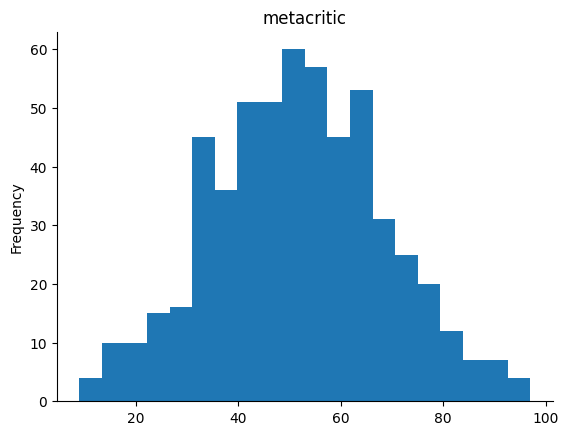

In [ ]:
# @title metacritic

from matplotlib import pyplot as plt
dataset_df['metacritic'].plot(kind='hist', bins=20, title='metacritic')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("thenlper/gte-large")

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
ex="   I am  a data scientist who create prodcut of data"

In [ ]:
ex

'   I am  a data scientist who create prodcut of data'

In [ ]:
ex.strip()

'I am  a data scientist who create prodcut of data'

In [ ]:
dataset_df["fullplot"][2]

'Michael "Beau" Geste leaves England in disgrace and joins the infamous French Foreign Legion. He is reunited with his two brothers in North Africa, where they face greater danger from their own sadistic commander than from the rebellious Arabs.'

In [ ]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text")
    return []

  embedding = embedding_model.encode(text)
  return embedding.tolist()

In [ ]:
dataset_df["embedding"]= dataset_df["fullplot"].apply(get_embedding)

In [ ]:
dataset_df.head(2)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments,embedding
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0,"[-0.009285837411880493, -0.005062109790742397,..."
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0,"[-0.0024393806234002113, 0.02309592440724373, ..."


In [ ]:
!pip install "pymongo[srv]"==3.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.7/771.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for pymongo: filename=pymongo-3.11.0-cp310-cp310-linux_x86_64.whl size=493668 sha256=3a94db19604e4e094806962ee4188ffa604775d7801aa2b2a16ce60fcf56c63a
  Stored in directory: /root/.cache/pip/wheels/df/6e/99/27524029bf53fd025e0d44093d77e4fc0b27c6344acd6f3e86
Successfully built pymongo
  Attempting uninstall: pymongo
    Found existing installation: pymongo 4.7.2
    Uninstalling pymongo-4.7.2:
      Successfully uninstalled pymongo-4.7.2
  Attempting uninstall: dnspython
    Found existing installation: dnspython 2.6.1
    Uninstalling dnspython-2.6.1:
      Successfully uninstalled dnspython-2.6.1


In [ ]:
from pymongo.mongo_client import MongoClient

In [ ]:
from google.colab import userdata
uri=userdata.get('MONGO_URI')

In [ ]:
# Create a new client and connect to the server
client = MongoClient(uri)

In [ ]:
# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [ ]:
def get_mongo_client(uri):
  try:
    client = MongoClient(uri)
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
    return client
  except Exception as e:
    print(e)
    return None

In [ ]:
mongo_client=get_mongo_client(uri)

Pinged your deployment. You successfully connected to MongoDB!


In [ ]:
db = mongo_client['moviedb']

In [ ]:
collection = db["moviecollection"]

In [ ]:
collection.insert_one({
    "name": "krishna",
    "age": 20,
    "location":"rajasthan"
})

In [ ]:
collection.delete_many({})

In [ ]:
doc = dataset_df.to_dict("records")


In [ ]:
collection.insert_many(doc)


print("completed")

completed


In [ ]:
{
 "fields": [{
     "numDimensions": 1024,
     "path": "embedding",
     "similarity": "cosine",
     "type": "vector"
   }]
}

{'fields': [{'numDimensions': 1024,
   'path': 'embedding',
   'similarity': 'cosine',
   'type': 'vector'}]}

In [ ]:
user_query="what is the best horror movie?"

In [ ]:
query_embedding=get_embedding(user_query)
query_embedding

[0.0320083312690258,
 -0.016375768929719925,
 -0.03466121852397919,
 0.001408362528309226,
 -0.0016439368482679129,
 -0.01220843754708767,
 -0.015490742400288582,
 0.04027732089161873,
 -0.008300934918224812,
 0.027359437197446823,
 0.032420944422483444,
 -0.007007700391113758,
 0.014090868644416332,
 -0.032076358795166016,
 -0.008688433095812798,
 -0.02813737653195858,
 -0.035497479140758514,
 -0.02312837354838848,
 -0.021521832793951035,
 0.010077069513499737,
 -0.008985675871372223,
 0.006707658991217613,
 -0.06067965552210808,
 -0.013847105205059052,
 -0.02073209546506405,
 0.016766943037509918,
 0.02398812398314476,
 -0.011809693649411201,
 0.036733228713274,
 0.08142602443695068,
 0.00792068149894476,
 -0.041727013885974884,
 0.0431947261095047,
 -0.03834754601120949,
 -0.028009740635752678,
 -0.01896689459681511,
 0.06600959599018097,
 -0.0005763377994298935,
 -0.021067503839731216,
 -0.03700760751962662,
 0.020190631970763206,
 0.002797145629301667,
 0.05587851628661156,
 -0.00

In [ ]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text.")
    return []

  embedding=embedding_model.encode(text)
  return embedding.tolist()

In [ ]:
def vector_search(user_query,collection):

  query_embedding=get_embedding(user_query)
  print(query_embedding)

  if query_embedding is None:
    return "Invalid query or embeddig is failed"

  pipeline=[

            {
                "$vectorSearch":{

                "index": "vector_index",
                "queryVector": query_embedding,
                "path": "embedding",
                "numCandidates": 150,  # Number of candidate matches to consider
                "limit": 4,  # Return top 4 matches


                }

            },

              {
                 "$project":{

                "fullplot": 1,  # Include the plot field
                "title": 1,  # Include the title field
                "genres": 1,  # Include the genres field
                "score": {"$meta": "vectorSearchScore"},  # Include the search score
                 }

            }

           ]

  result=collection.aggregate(pipeline)
  return list(result)


In [ ]:
def get_search_result(query,collection):

  get_knowledge=vector_search(query,collection)

  search_result=""

  for result in get_knowledge:
        search_result += f"Title: {result.get('title', 'N/A')}, Plot: {result.get('fullplot', 'N/A')}\n"

  return search_result

In [ ]:
query="what is the best horror movie to watch and why?"

source_information=get_search_result(query,collection)

[0.019185977056622505, -0.01547294668853283, -0.03955464065074921, 0.0023692904505878687, -0.002659196499735117, 0.005181792192161083, -0.0075131980702281, 0.04510665312409401, -0.018112152814865112, 0.042973391711711884, 0.013434062711894512, -0.002870825817808509, 0.0054796673357486725, -0.031249191612005234, -0.004083299543708563, -0.031060393899679184, -0.04105725139379501, -0.03010973148047924, -0.032163672149181366, 0.027480388060212135, -0.003167531220242381, 0.016843508929014206, -0.04414495825767517, -0.023998169228434563, -0.01558179035782814, 0.01787446066737175, 0.021615227684378624, -0.030424680560827255, 0.04588266834616661, 0.07223066687583923, 0.0023236724082380533, -0.04596638306975365, 0.02617713436484337, -0.04897381365299225, -0.03348347544670105, -0.010095011442899704, 0.0548892579972744, 0.00158393825404346, -0.0027255003806203604, -0.03803258016705513, 0.016657156869769096, 0.014302369207143784, 0.04556025192141533, -0.011216191574931145, -0.050463683903217316, 0

In [ ]:
vector_search("what is the best horror movie to watch and why?",collection)

[0.019185977056622505, -0.01547294668853283, -0.03955464065074921, 0.0023692904505878687, -0.002659196499735117, 0.005181792192161083, -0.0075131980702281, 0.04510665312409401, -0.018112152814865112, 0.042973391711711884, 0.013434062711894512, -0.002870825817808509, 0.0054796673357486725, -0.031249191612005234, -0.004083299543708563, -0.031060393899679184, -0.04105725139379501, -0.03010973148047924, -0.032163672149181366, 0.027480388060212135, -0.003167531220242381, 0.016843508929014206, -0.04414495825767517, -0.023998169228434563, -0.01558179035782814, 0.01787446066737175, 0.021615227684378624, -0.030424680560827255, 0.04588266834616661, 0.07223066687583923, 0.0023236724082380533, -0.04596638306975365, 0.02617713436484337, -0.04897381365299225, -0.03348347544670105, -0.010095011442899704, 0.0548892579972744, 0.00158393825404346, -0.0027255003806203604, -0.03803258016705513, 0.016657156869769096, 0.014302369207143784, 0.04556025192141533, -0.011216191574931145, -0.050463683903217316, 0

[{'_id': ObjectId('6659ea8b73eed437a8ab5daf'),
  'title': 'Pet Sematary II',
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'genres': ['Action', 'Horror', 'Thriller'],
  'score': 0.9052295684814453},
 {'_id': ObjectId('6659ea8b73eed437a8ab604a'),
  'title': 'Dawn of the Dead',
  'fullplot': 'Ana, a young beautiful nurse finishes her day-shift at the hospital to return home to her beloved husband, they make love and sleep together. The next day, after her husband is killed by her neighbor next door, he suddenly comes back to life. She discovers the chaos happening in her neighborhood and escapes from her home. Soon after coming to her senses in the woods, she encounters a cop and other survivors, they decide to find safety in a mall. Soon more survivors come, and they learn that if they want to stay al

In [ ]:
combined_information = f"Query: {query}\nContinue to answer the query by using the Search Results:\n{source_information}."

print(combined_information)

Query: what is the best horror movie to watch and why?
Continue to answer the query by using the Search Results:
.


In [ ]:
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.23.1
    Uninstalling huggingface-hub-0.23.1:
      Successfully uninstalled huggingface-hub-0.23.1


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b-it")

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [ ]:
# CPU Enabled uncomment below 👇🏽
# model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it")
# GPU Enabled use below 👇🏽
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it", device_map="auto")

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
# Moving tensors to GPU
input_ids = tokenizer(combined_information, return_tensors="pt").to("cuda")

In [ ]:
response = model.generate(**input_ids, max_new_tokens=500)

In [ ]:
print(tokenizer.decode(response[0]))